In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
'Done'

'Done'

The linear algebra for LSH can be broken into two parts which I'll demonstrate using two-dimensional *points* and *lines* but also generalize to $d$-dimensional *vectors* and *hyperplanes*.

1. Given two points, $p = (1, 2)$ and $q = (2, 1)$, find the line $r$ equidistant and perpendicular to both points. This is done once for each bit in each hash function when you "fit" an LSH model using a random sample of points.
2. Use $r$ to formulate a hash function $h(v, r)$, such that for any new point $v$, if the point falls on one side of $r$, then $h(v, r) = 0$, and if it falls on the other side, then $h(v, r) = 1$. This is what happens when you "hash" a new point to approximate its location. You would do this multiple times to eventually represent the position as an integer comprised from the series of binary hashes.

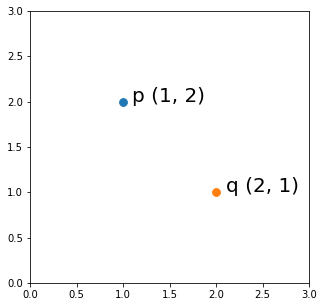

In [2]:
plt.figure(figsize=(5, 5))
plt.scatter([1], [2], s=60)
plt.text(1.1, 2, 'p (1, 2)', size=20)
plt.scatter([2], [1], s=60)
plt.text(2.1, 1, 'q (2, 1)', size=20)
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()

For these two points you can visually deduce that the line $r$ will be a simple line with form $y = x$.

You can also imagine that if a point $v$ falls on $p$'s "side" of the line, then $h(v, r) = 1$, 
whereas if $v$ falls on $q$'s "side" of the line, then $h(v, r) = 0$.

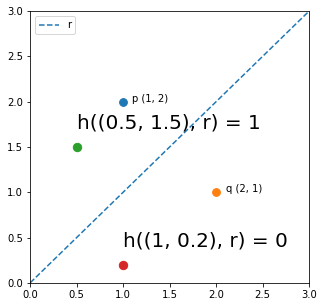

In [41]:
plt.figure(figsize=(5, 5))
plt.scatter([1], [2], s=60)
plt.text(1.1, 2, 'p (1, 2)', size=10)
plt.scatter([2], [1], s=60)
plt.text(2.1, 1, 'q (2, 1)', size=10)
plt.plot(np.linspace(0, 3, 2), np.linspace(0, 3, 2), linestyle='--', label='r')
plt.scatter([0.5], [1.5], s=70)
plt.text(0.5, 1.7, 'h((0.5, 1.5), r) = 1', size=20)
plt.scatter([1], [0.2], s=70)
plt.text(1.0, 0.4, 'h((1, 0.2), r) = 0', size=20)
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.legend()
plt.show()

At this point the intuition should be clear: given a pair of points $p$ and $q$, find a line $r$ that evenly splits them. Given any other point $v$, you hash $v$ based on its location relative $r$. If $v$ is above $r$, the hash is 1. Otherwise it's 0.

This still lacks some formalization.. How do you generalize this intuition to find $r$ for any two arbitrary points? How do you formulate the function $h(v, r)$ such that it represents the notion of "falling on a side of $r$"?

In order to find $r$, first note that $r$ must go through the midpoint of $p$ and $q$, which is computed:

$m = \frac{p + q}{2} = ((1,2) + (2, 1)) / 2 = (1.5, 1.5)$

Note that this generalizes nicely to more than two dimensions.

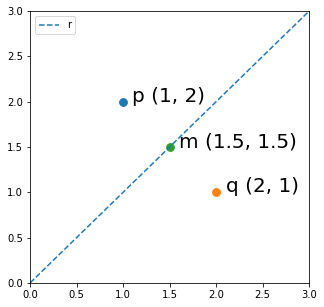

In [42]:
plt.figure(figsize=(5, 5))
plt.scatter([1], [2], s=60)
plt.text(1.1, 2, 'p (1, 2)', size=20)
plt.scatter([2], [1], s=60)
plt.text(2.1, 1, 'q (2, 1)', size=20)
plt.plot(np.linspace(0, 3, 2), np.linspace(0, 3, 2), linestyle='--', label='r')
plt.scatter([1.5], [1.5], s=60)
plt.text(1.6, 1.5, 'm (1.5, 1.5)', size=20)
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.legend()
plt.show()

Given the midpoint $m$, can you define line $r$ in a way that lets us define the hash function?

It turns out you can solve for a point $n = (n_0, n_1)$, such that for any point $s = (s_0, s_1)$ on line $r$, the following holds:

$0 = n_0 (s_0 - m_0) + n_1 (s_1 - m_1)$

This means that evaluating any point $s$ from line $r$ in the above equation will evaluate to 0. If you evaluate a point which doesn't fall on line $r$, then it will evaluate to a non-zero value, which by definition must be either positive or negative. This should start to look kind of like a hash function.

So how can you find point $n$? It turns out you can plug in one of the points $p$ or $q$ and solve for $n$. Remember that vector arithmetic applies here.

$ n_0 (p_0 - m_0) + n_1 (p_1 - m_1) = 0\\
(n_0, n_1) + (p_0 - m_0, p_1 - m_1) = 0 \\
(n_0, n_1) + ((p_0, p_1) - (m_0, m_1)) = 0 \\
(n_0, n_1) = (p_0, p_1) - (m_0, m_1) \\
n = p - m = (1, 2) - (1.5, 1.5) = (-0.5, 0.5)
$

Now we known the values of $n$. Let's quickly test the claim that evaluating any point $s$ from line $r$ will evaluate to 0. We know the point (1,1) lies on the line $r$.

$ (-0.5)(1 - 1.5) + (0.5)(1 - 1.5) = 0 $

Cool. What about the two points (0.5, 1.5) and (1, 0.5), which fall "above" and "below" $r$, respectively?

$ (-0.5)(0.5 - 1.5) + (0.5)(1.5 - 1.5) = 0.5$

$ (-0.5)(1 - 1.5) + (0.5)(0.5 - 1.5) = -0.25$

One is positive and one is not. So we've found a hash function. 

Specifically, the hash function is defined:

$h(v, r) = h(v, n, m) = \text{sign}(n\cdot v + n \cdot m) = 1[n \cdot v > n \cdot m]$

For any vector $v$, you would apply many such functions $h_1(v, r_1), h_2(v, r_2), ... h_b$ to compute a $b$-bit hash value that approximates the location of $v$ in the vector space.









